In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
PATH = "/content/drive/MyDrive/dataset/Covid19-dataset"

train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')
val_dir = os.path.join(PATH, 'valid')

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
valid_dataset = image_dataset_from_directory(val_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
test_dataset = image_dataset_from_directory(test_dir, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Found 208 files belonging to 3 classes.
Found 49 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


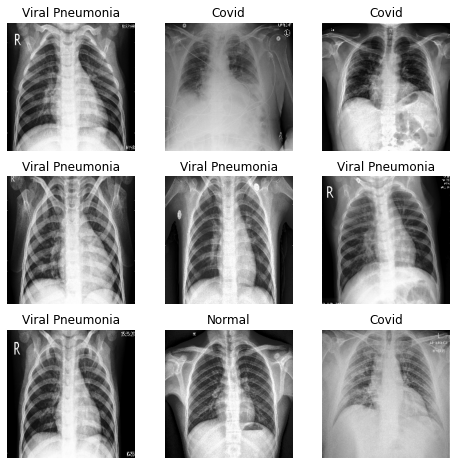

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.03,),
  tf.keras.layers.GaussianNoise(0.3),
])

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)

In [ ]:
model = tf.keras.Sequential([
       tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SHAPE)),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 52, 52, 256)       295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 512)      

In [ ]:
BASE_LEARNING_RATE = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=BASE_LEARNING_RATE),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:

history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=valid_dataset)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


7/7 [==============================] - 84s 11s/step - loss: 188.7970 - accuracy: 0.3558 - val_loss: 2.3870 - val_accuracy: 0.3878
Epoch 2/50
7/7 [==============================] - 83s 11s/step - loss: 1.3926 - accuracy: 0.4087 - val_loss: 1.0670 - val_accuracy: 0.3878
Epoch 3/50
7/7 [==============================] - 85s 12s/step - loss: 1.0474 - accuracy: 0.4615 - val_loss: 1.1476 - val_accuracy: 0.3061
Epoch 4/50
7/7 [==============================] - 83s 11s/step - loss: 1.0494 - accuracy: 0.4327 - val_loss: 1.0934 - val_accuracy: 0.5102
Epoch 5/50
7/7 [==============================] - 87s 12s/step - loss: 0.8184 - accuracy: 0.7067 - val_loss: 0.9961 - val_accuracy: 0.6327
Epoch 6/50
7/7 [==============================] - 81s 11s/step - loss: 0.6258 - accuracy: 0.7452 - val_loss: 0.6435 - val_accuracy: 0.7347
Epoch 7/50
7/7 [==============================] - 82s 11s/step - loss: 0.3782 - accuracy: 0.8510 - val_loss: 0.3996 - val_accuracy: 0.8367
Epoch 8/50
7/7 [====================

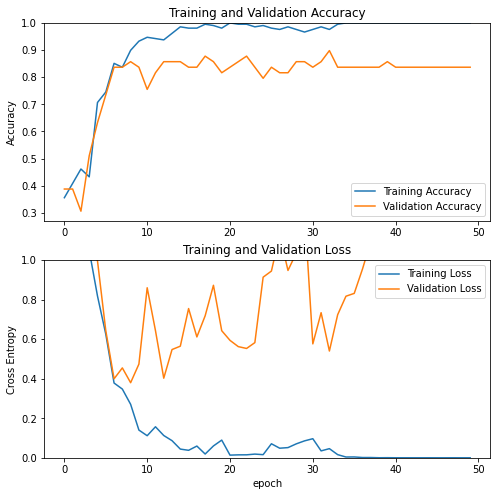

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()